In [2]:
import matplotlib.pyplot as plt
import numpy as np

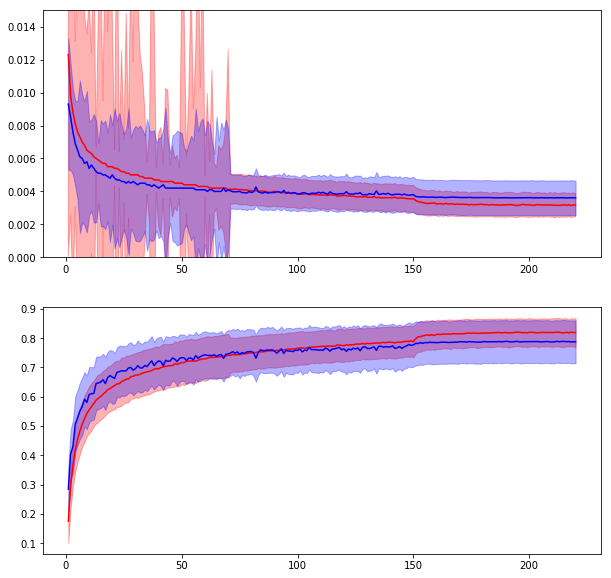

In [3]:
%matplotlib inline
import pickle
data = pickle.load(open("1-220.dat"))

losses = list()
acces = list()
losses_avg = list()
acces_avg = list()

losses_val = list()
acces_val = list()
losses_avg_val = list()
acces_avg_val = list()

train_data_count = 1854
val_data_count = 247

def convert(raw_data, loss_list, acc_list, avg_loss_list, avg_acc_list):
    acc_sum = 0.
    loss_sum = 0.
    for i, it in enumerate(raw_data):
        if len(it) == 2:
            loss = float(it[0]) * (i + 1) - loss_sum
            acc = float(it[1]) * (i + 1) - acc_sum
            loss_sum = float(it[0]) * (i + 1)
            acc_sum = float(it[1]) * (i + 1)
        elif len(it) == 4:
            loss = float(it[2])
            acc = float(it[3])
            loss_sum += loss
            acc_sum += acc
        else:
            assert False
        loss_list.append(loss)
        acc_list.append(acc)
    avg_loss_list.append(loss_sum / len(raw_data))
    avg_acc_list.append(acc_sum / len(raw_data))

for epoch in data:
    acc_sum = 0.
    loss_sum = 0.
    train_data = data[epoch][:train_data_count]
    val_data = data[epoch][train_data_count:]
    assert len(train_data) == train_data_count and len(val_data) == val_data_count
    convert(train_data, losses, acces, losses_avg, acces_avg)
    convert(val_data, losses_val, acces_val, losses_avg_val, acces_avg_val)
    
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

def get_yerr(y, mean_size):
    return np.array(y).reshape((-1, mean_size)).std(-1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

errorfill(np.arange(len(losses_avg), dtype=np.float32)+1, losses_avg, get_yerr(losses, train_data_count), color="r", ax=ax1)
errorfill(np.arange(len(losses_avg_val), dtype=np.float32)+1, losses_avg_val, get_yerr(losses_val, val_data_count), color="b", ax=ax1)
ax1.set_ylim(0.0, 0.015)

errorfill(np.arange(len(acces_avg), dtype=np.float32)+1, acces_avg, get_yerr(acces, train_data_count), color="r", ax=ax2)
errorfill(np.arange(len(acces_avg_val), dtype=np.float32)+1, acces_avg_val, get_yerr(acces_val, val_data_count), color="b", ax=ax2)
# ax2.set_ylim(0.0, 0.015)


In [35]:
import sys
sys.path.insert(0, "/home/qite/my/pytorch-pose/")
from pose.datasets import Mpii
mpii = Mpii(jsonfile='/home/qite/my/pytorch-pose/data/mpii/mpii_annotations.json',
            img_folder='/home/qite/my/pytorch-pose/data/mpii/images',
            meanstd_file='/home/qite/my/pytorch-pose/data/mpii/mean.pth.tar',
            sigma=1, label_type="Gaussian", train=False, label_data=Mpii.LABEL_PARTS_MAP)
preds = np.load("/home/qite/my/pytorch-pose/checkpoint/mpii/hg_part_S1_B1/preds_valid.npy")

index: 0
2.0356
2.02049
1.91883
2.03793
1.90992
1.91265
0.455413
1.96545
0.530714
2.03747
2.04222
2.03851
2.04022
2.04659
2.03779


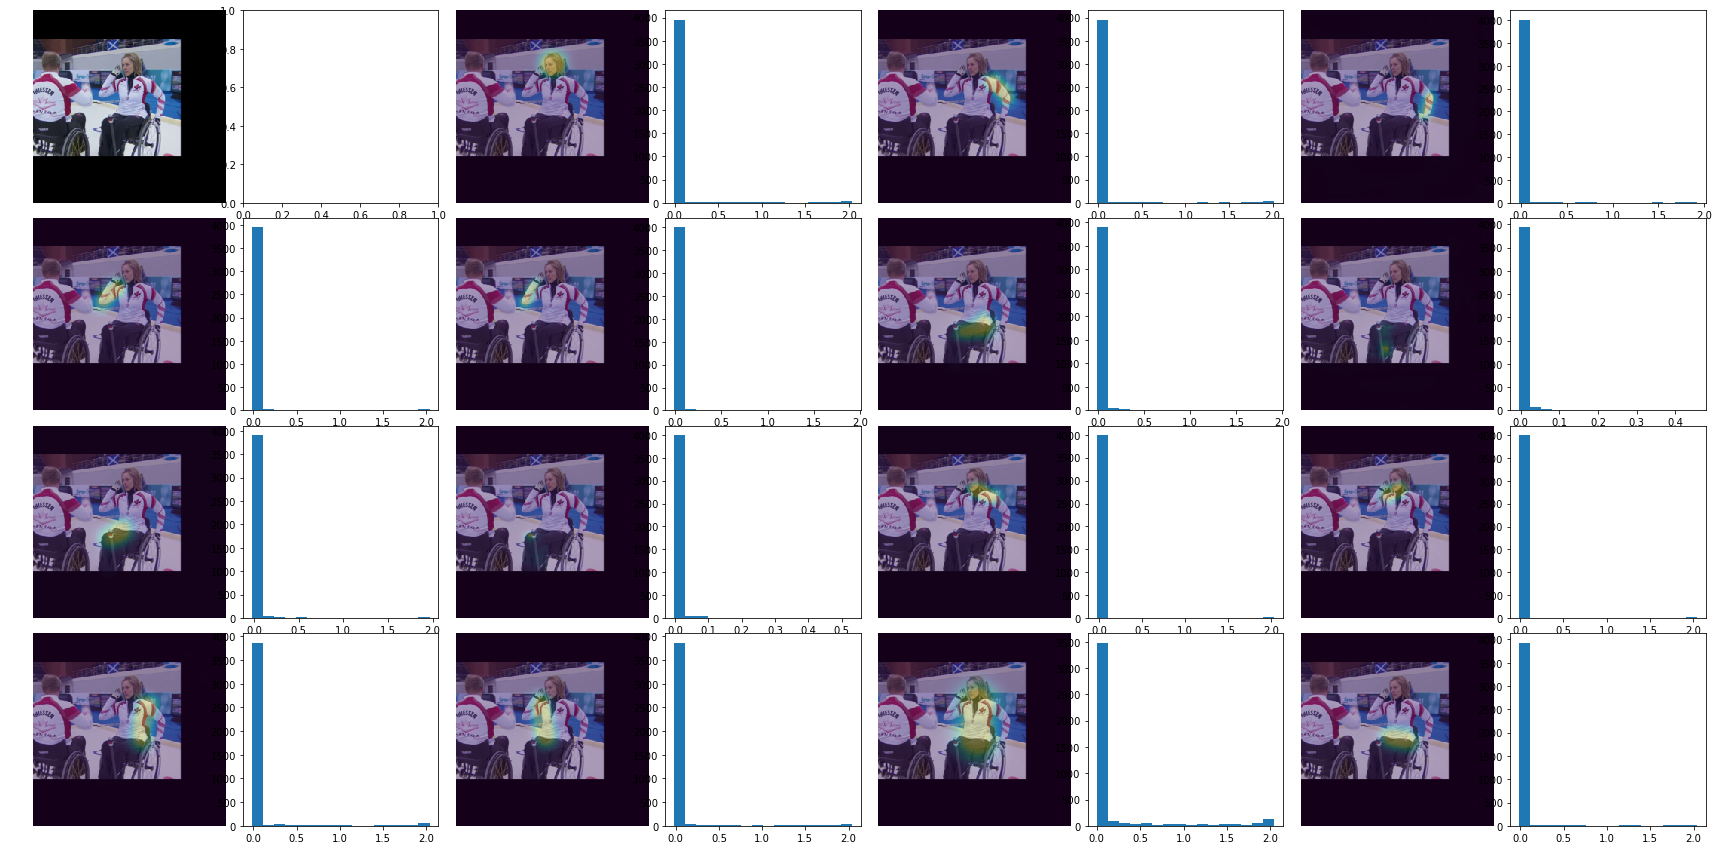

index: 1
2.01563
2.02229
2.14083
2.01992
2.02558
2.0275
1.95746
2.04851
1.91514
2.0007
1.98362
2.0339
2.00027
2.0472
2.18081


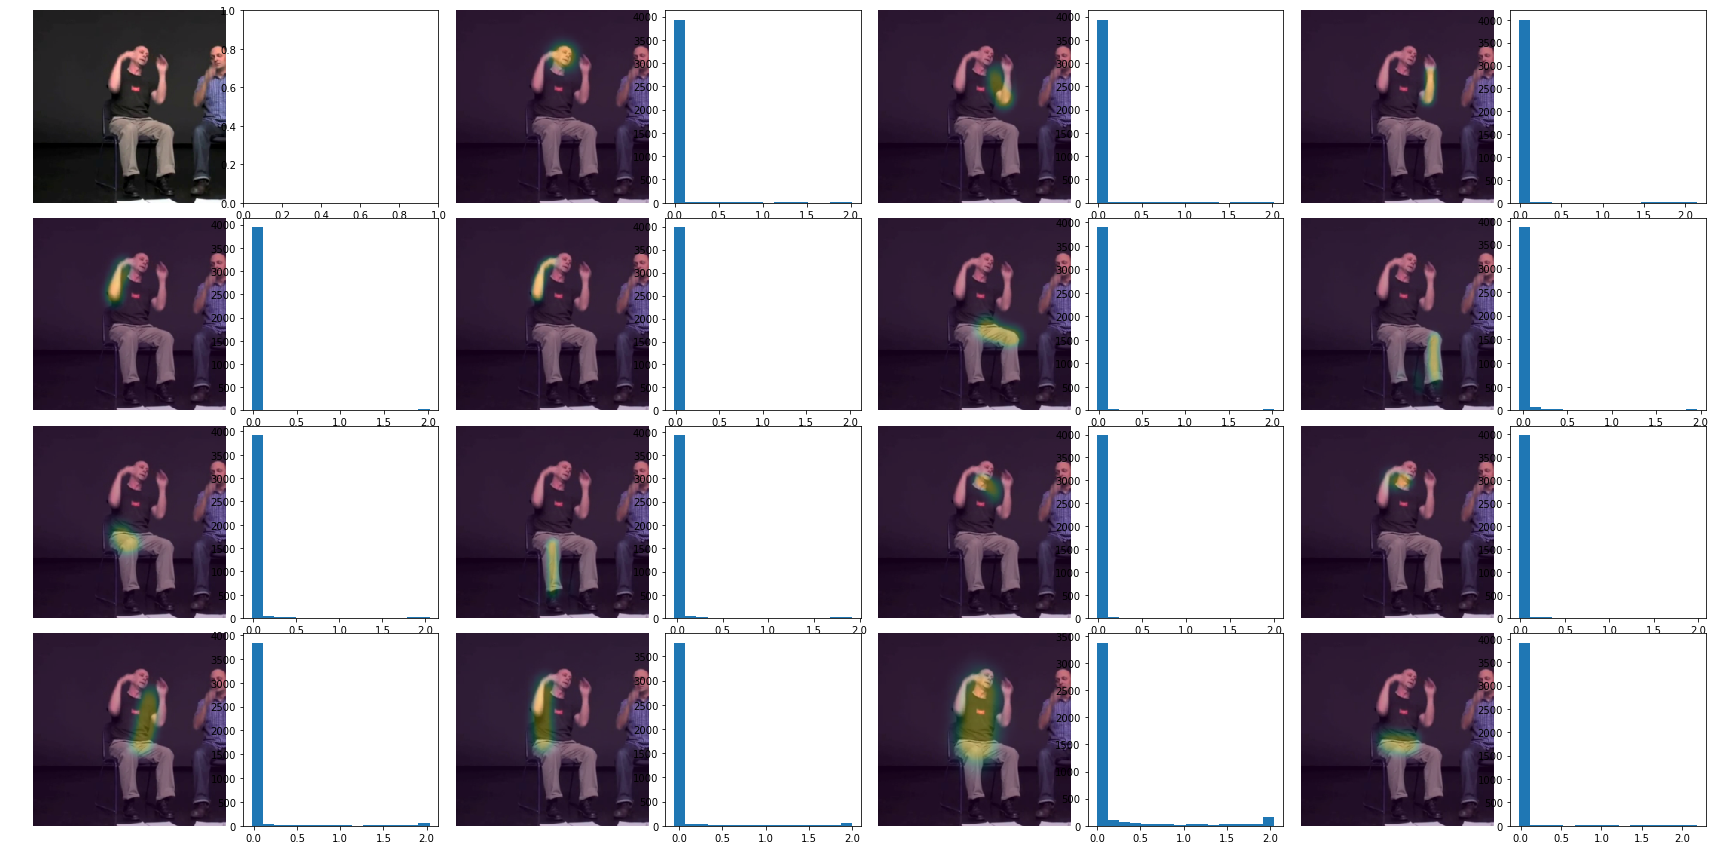

index: 2
2.02574
2.05495
2.06124
2.01139
1.01431
1.98816
0.183207
2.01459
0.297781
2.05247
2.04339
2.05764
2.04499
2.0271
2.01307


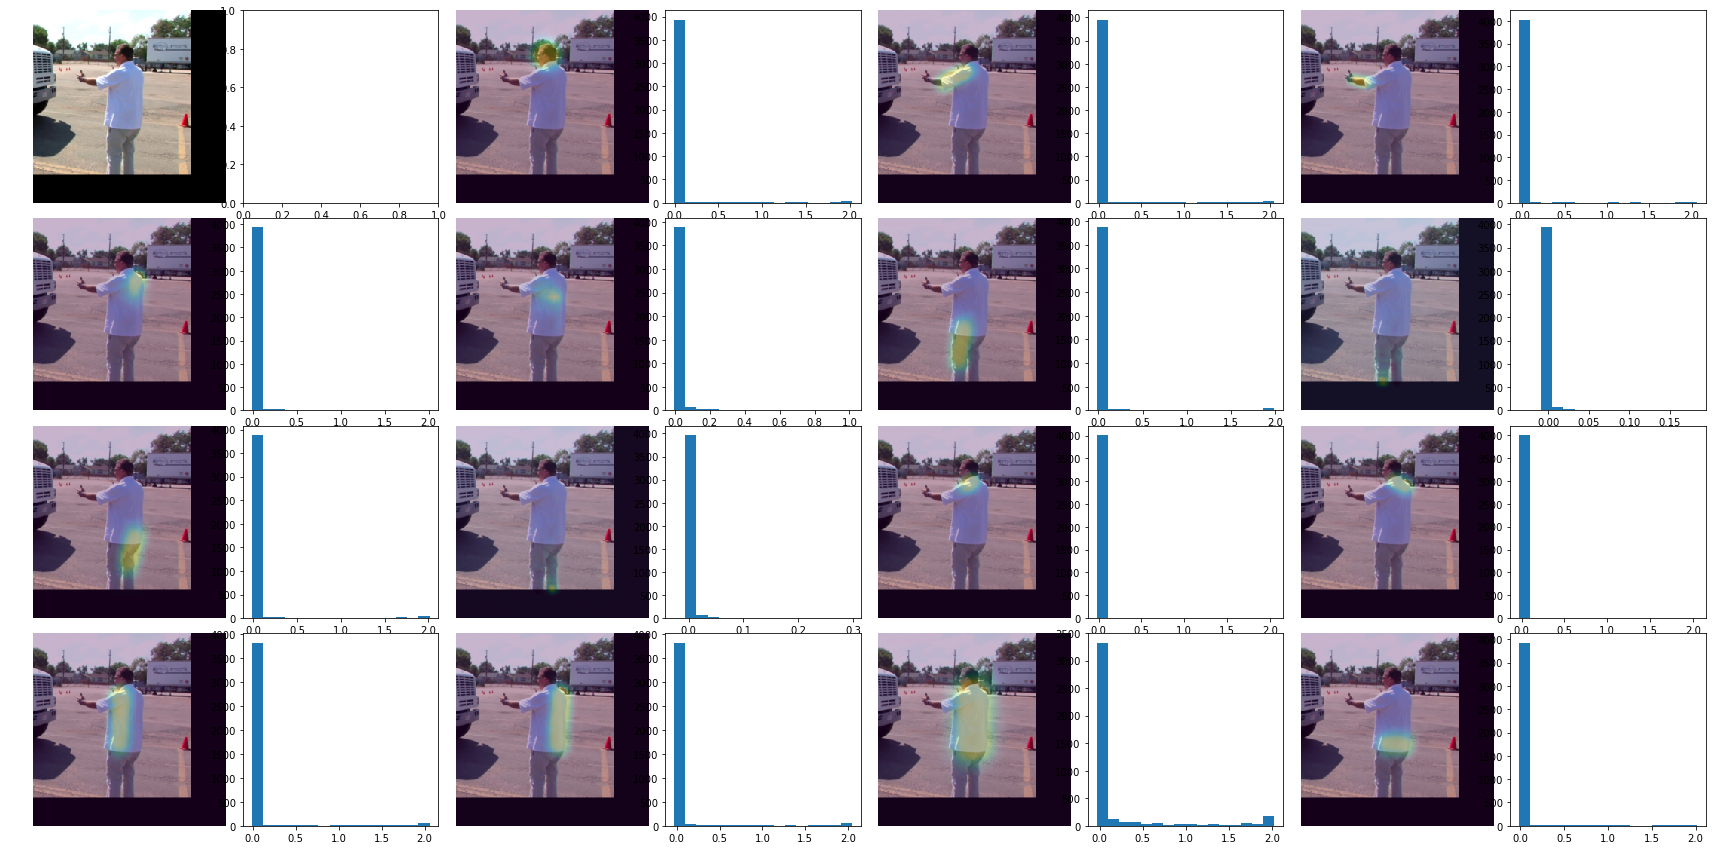

index: 3
2.0444
1.99297
2.05944
2.04967
1.98103
1.94416
0.0966444
1.88009
0.158097
2.05226
2.05
2.02226
2.00955
2.01258
1.96478


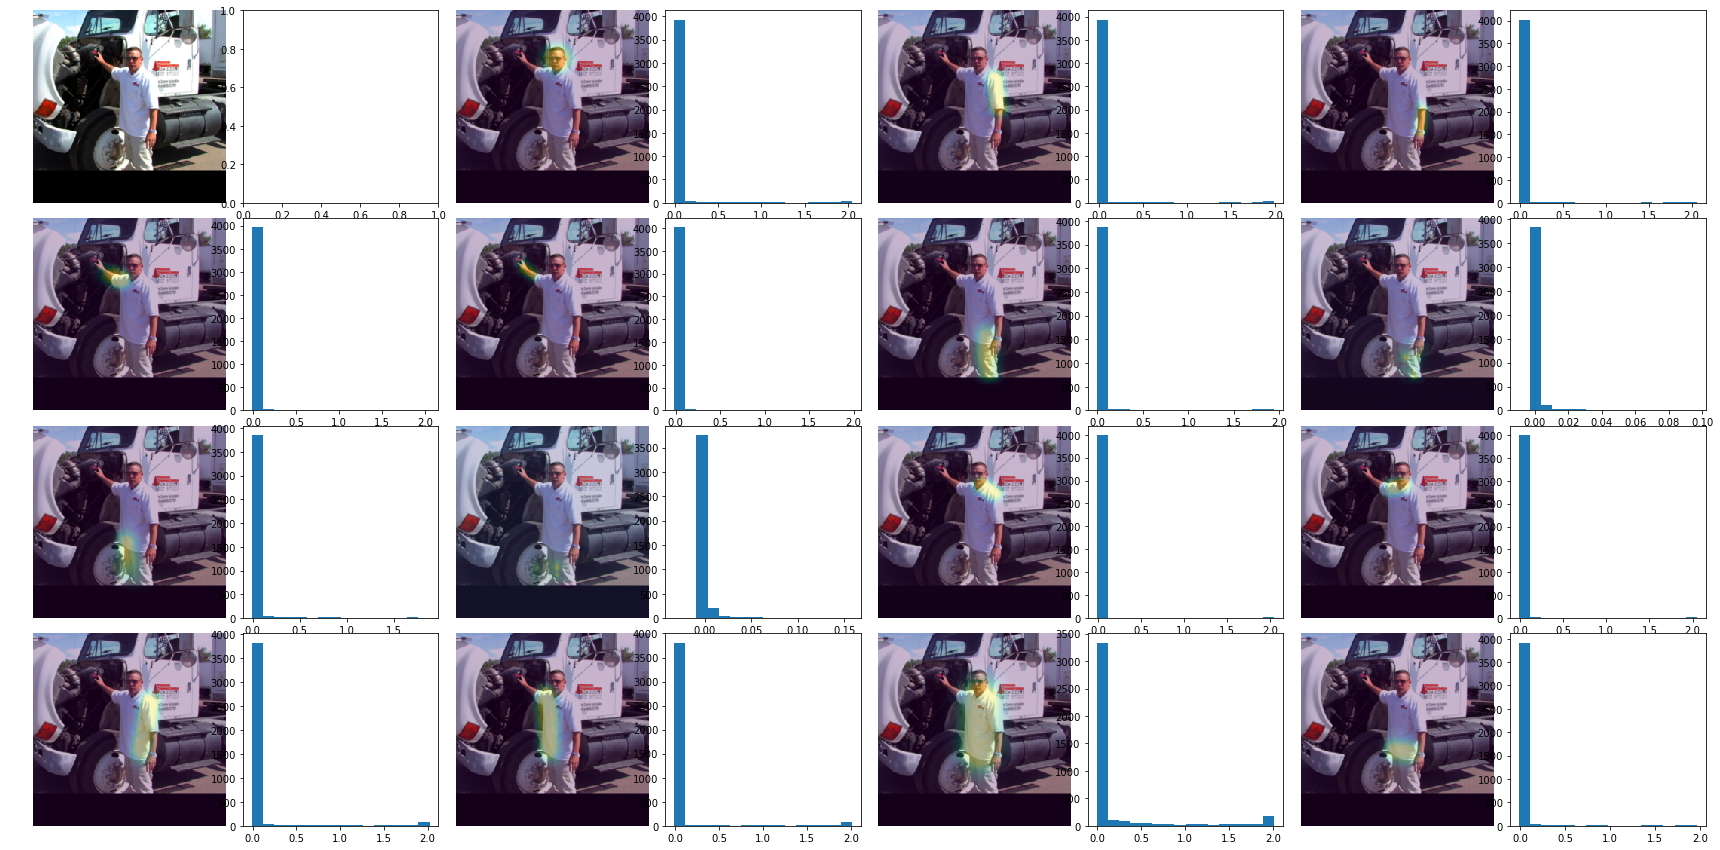

index: 4
2.02961
2.01134
2.06611
1.99182
2.01777
1.9948
1.95401
2.01412
1.89553
2.04846
2.04367
2.01615
2.01499
2.02589
1.97388


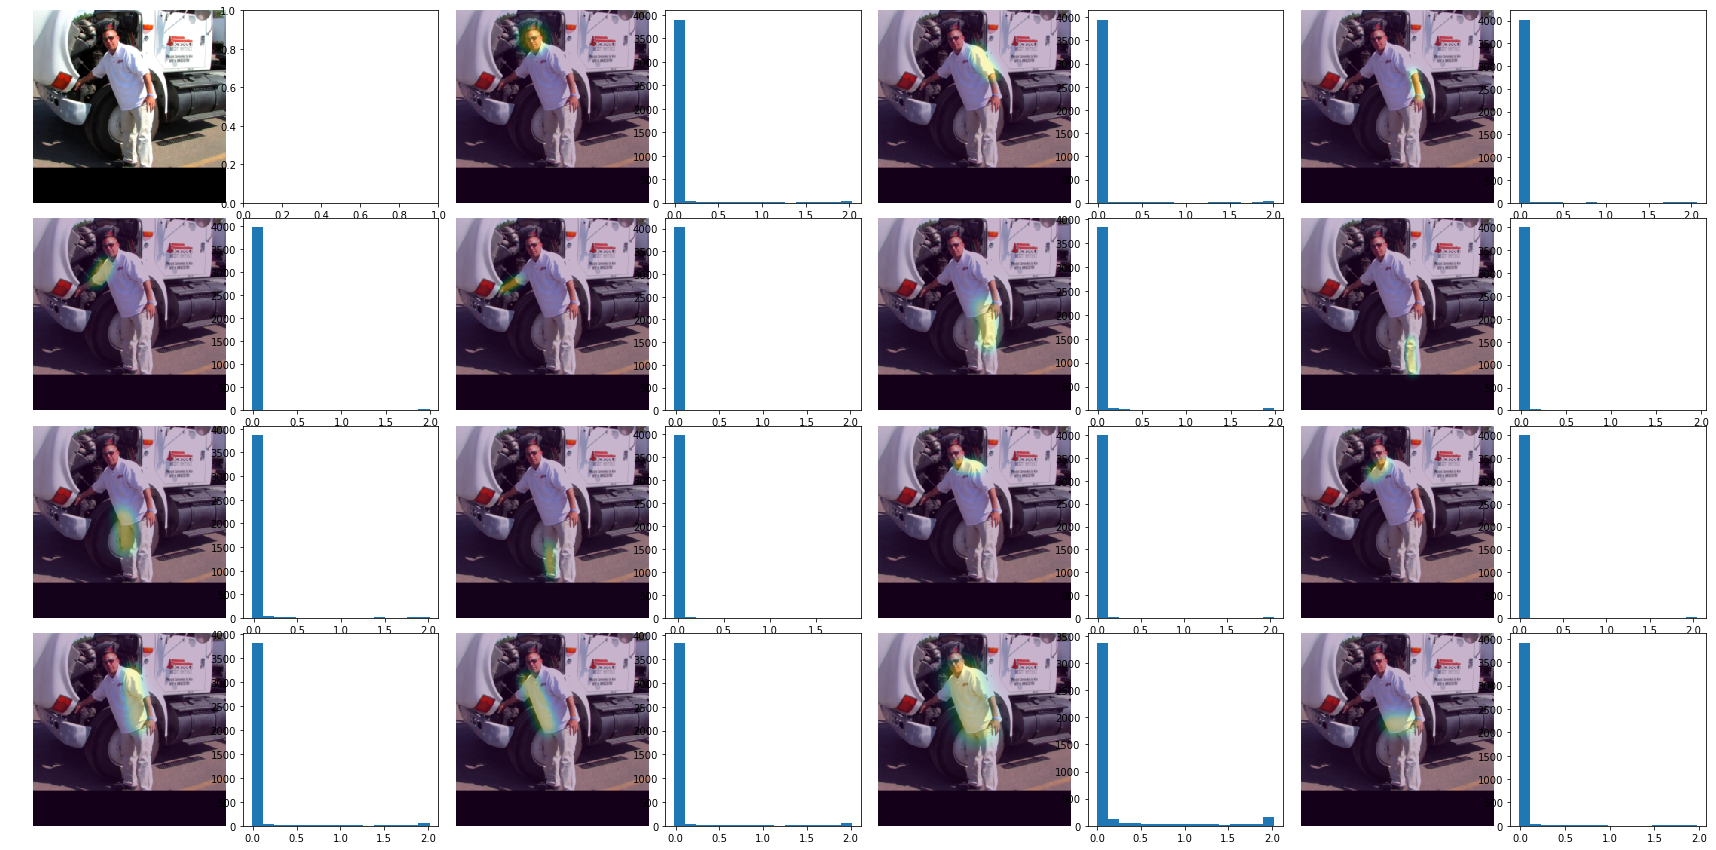

index: 5
2.04824
1.99949
1.96341
1.79738
0.625187
2.08344
1.98908
2.01694
1.99036
1.94138
1.93938
2.09145
1.99262
2.04672
2.00798


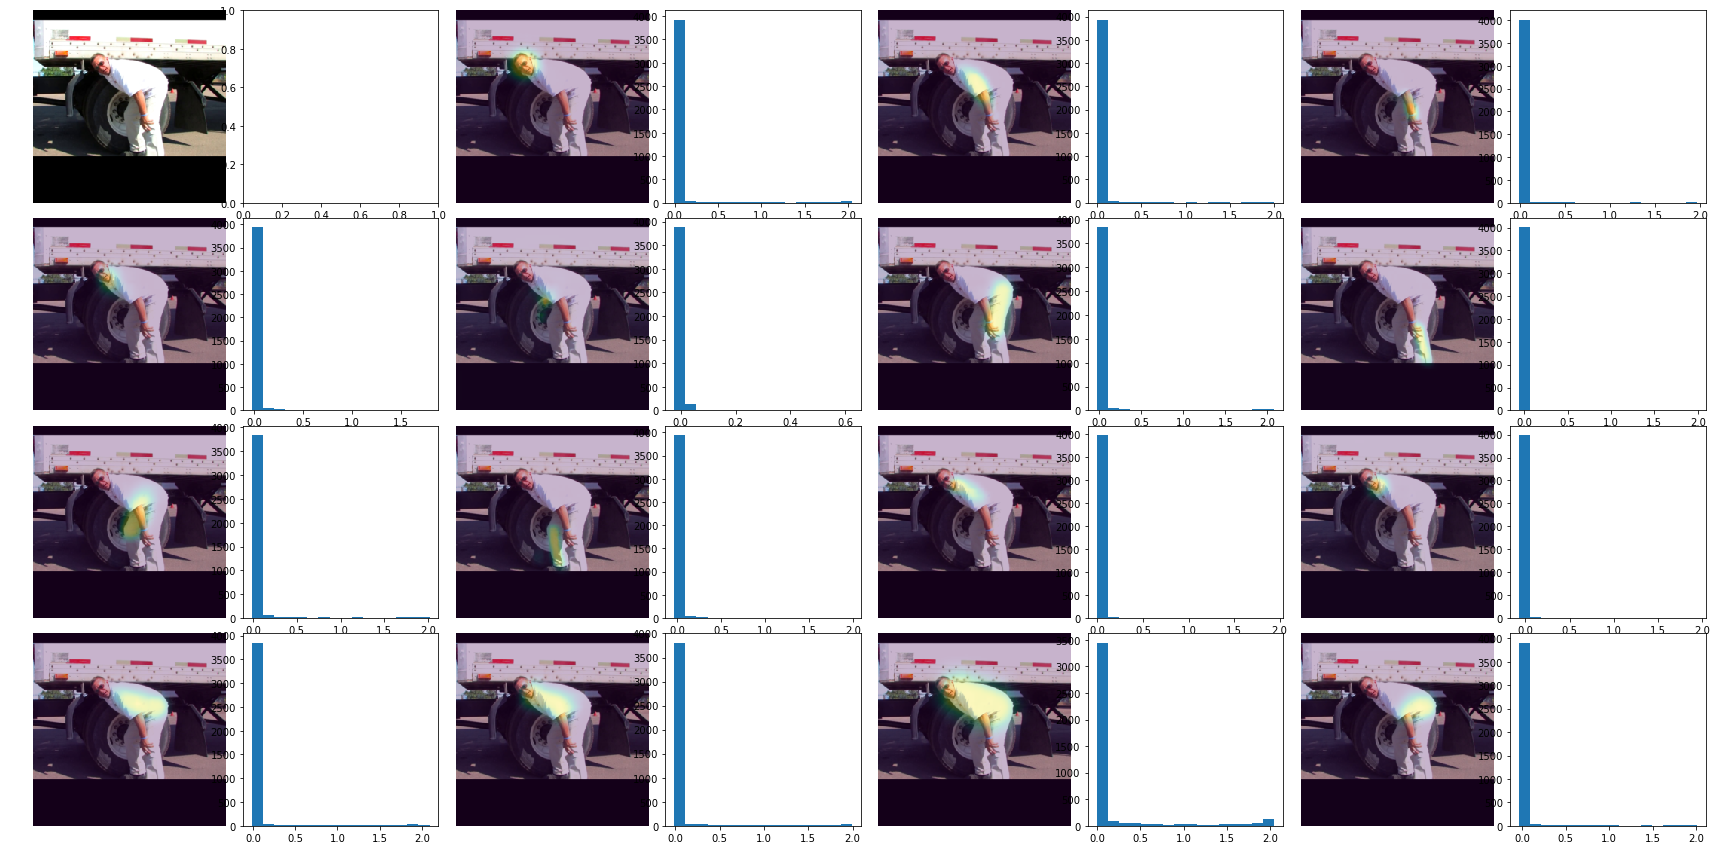

index: 6


KeyboardInterrupt: 

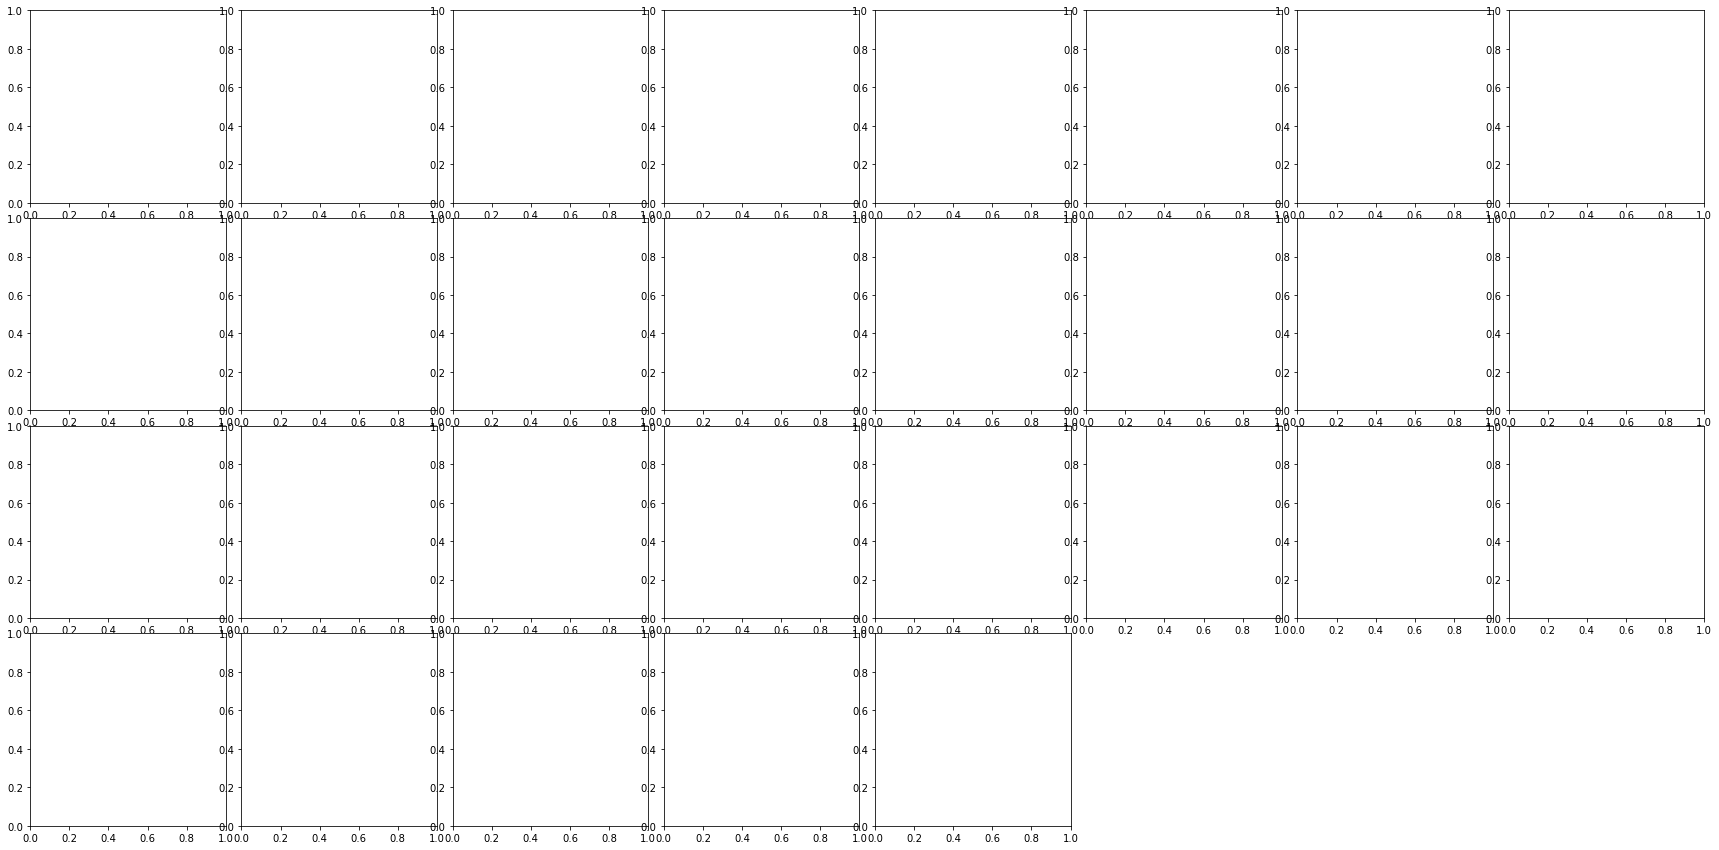

In [38]:
from pose.utils.misc import to_numpy
from scipy.misc import imresize

for index in range(len(mpii)):
    print("index: {}".format(index))
    fig, axs = plt.subplots(4, 8, figsize=(30, 15), gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
    img = mpii[index][0]
    img = to_numpy(img + mpii.mean.view(3,1,1).expand_as(img)).transpose(1,2,0)

    axs[0,0].imshow(img)
    axs[0,0].axis('off')
    for i in range(0, 15):
        ax = axs.flatten()[(i+1)*2]
        ax_hist = axs.flatten()[(i+1)*2+1]
        timg = imresize(preds[index, i], img.shape[:2])
        # print(timg.mean())
        # print(timg.var())
        # timg[timg < 0.9] = 0
        ax.imshow(img)
        ax.imshow(timg, alpha=0.3)
        ax.axis('off')
        ax_hist.hist(preds[index, i].ravel(), bins=16)
        print(preds[index, i].max())
        # ax_hist.axis('off')
    plt.show()